In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('output\csv\dataset.csv')

In [3]:
data

,Torso Area,Perpendicular Distance Left Shoulder,Perpendicular Distance Right Shoulder,Angle Degree,Target
0,0.395102,4.323329,3.931833,177.488531,0
1,0.366459,6.963297,7.297625,173.520042,0
2,0.430990,3.406691,2.961214,177.539036,0
3,0.359328,8.324855,8.771080,177.568173,0
4,0.386787,86.983563,86.517446,175.767845,0
...,...,...,...,...,...
110,0.598188,5.431630,4.932817,178.259733,1
111,0.556449,14.240275,14.703865,178.594530,1
112,0.605117,4.625020,4.082232,178.116250,1
113,0.597252,4.077181,3.497751,179.309863,1


array([[<Axes: title={'center': 'Torso Area'}>,
        <Axes: title={'center': 'Perpendicular Distance Left Shoulder'}>],
       [<Axes: title={'center': 'Perpendicular Distance Right Shoulder'}>,
        <Axes: title={'center': 'Angle Degree'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

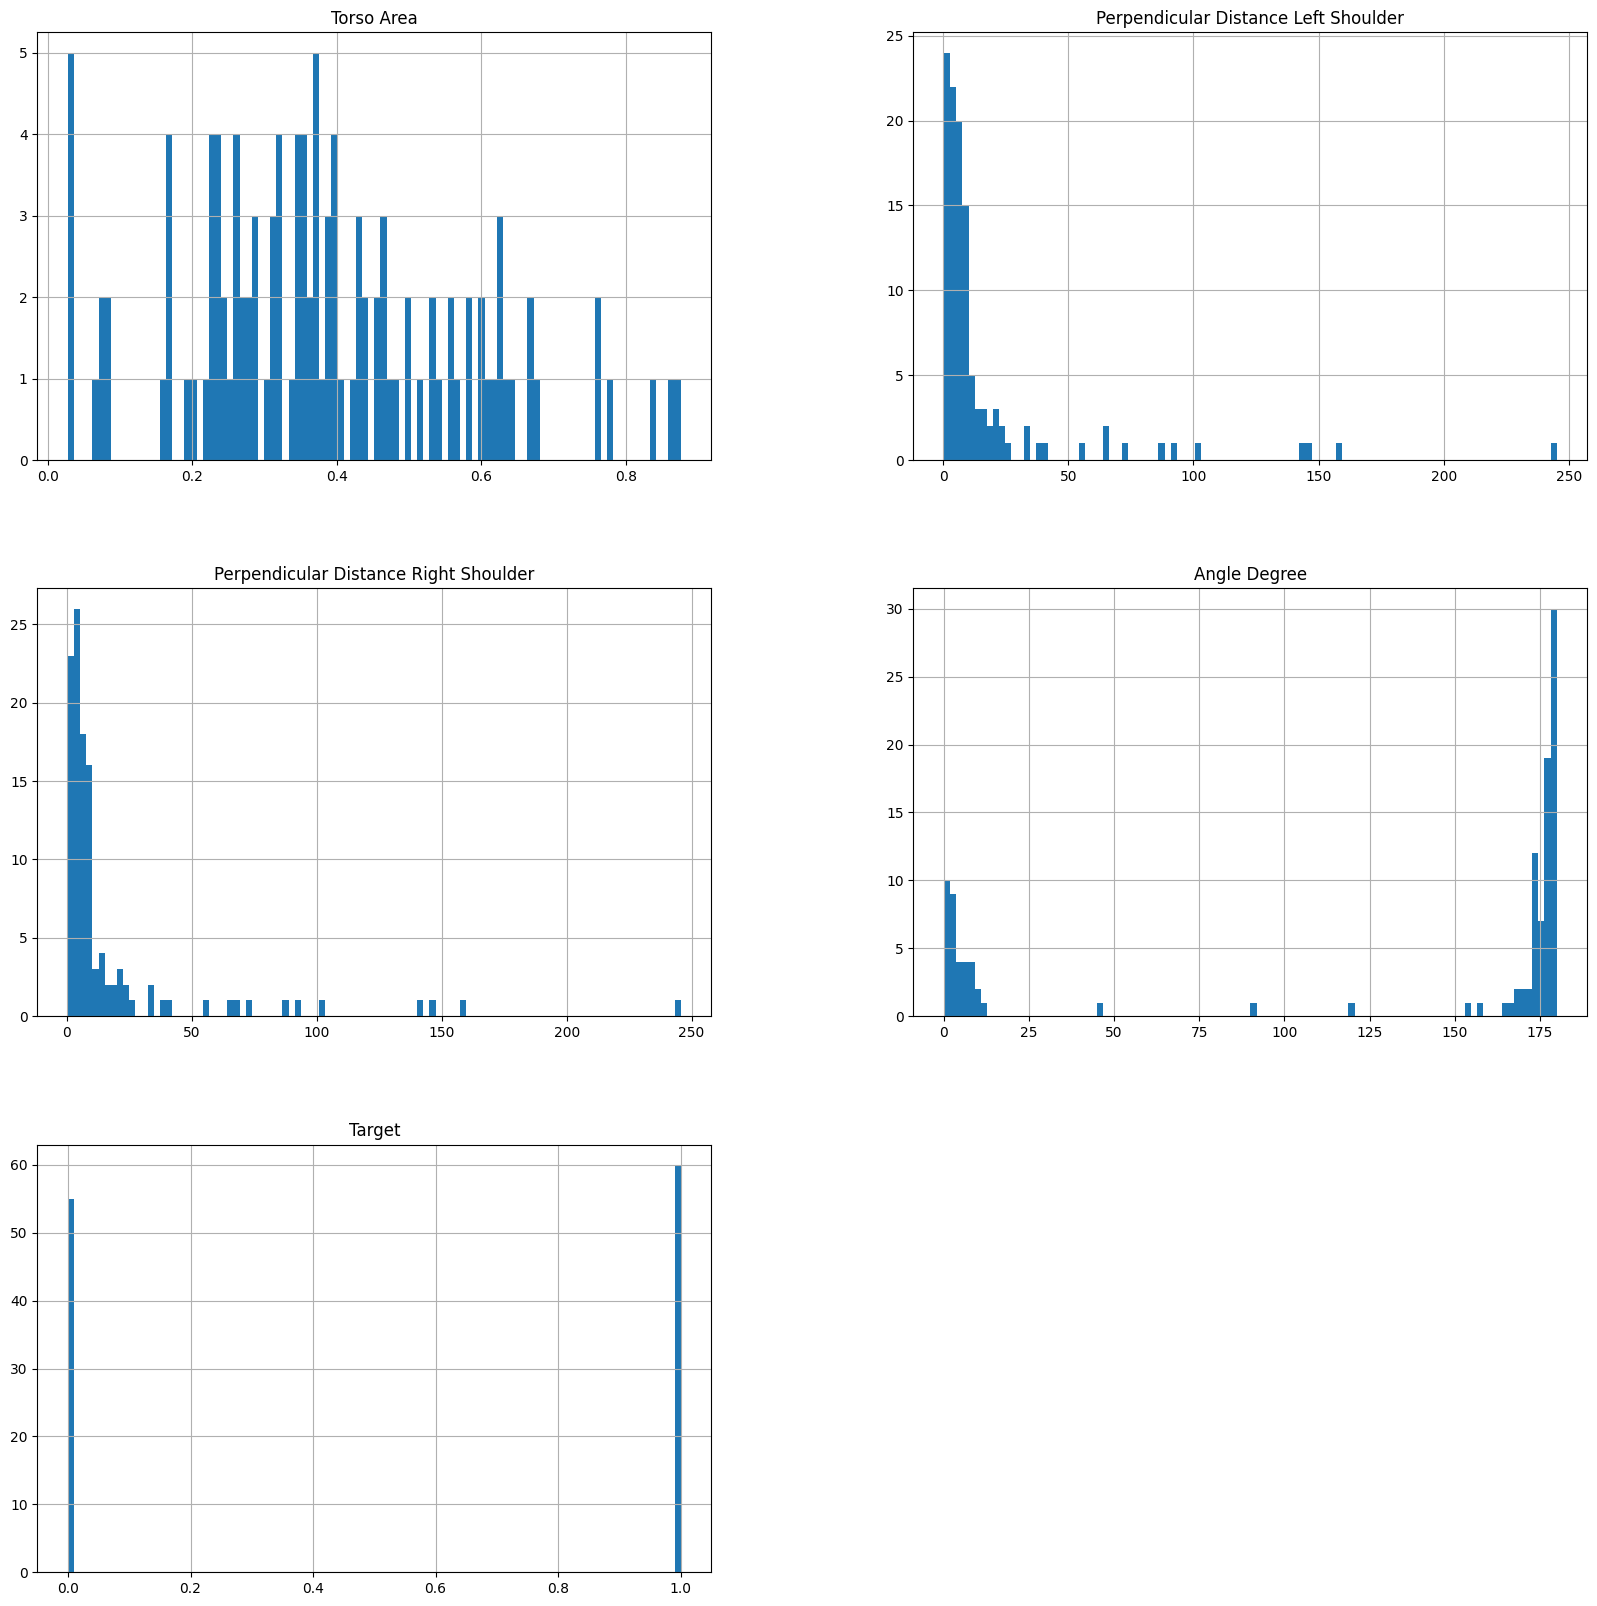

In [4]:
data.hist(figsize=(20,20), bins=100)

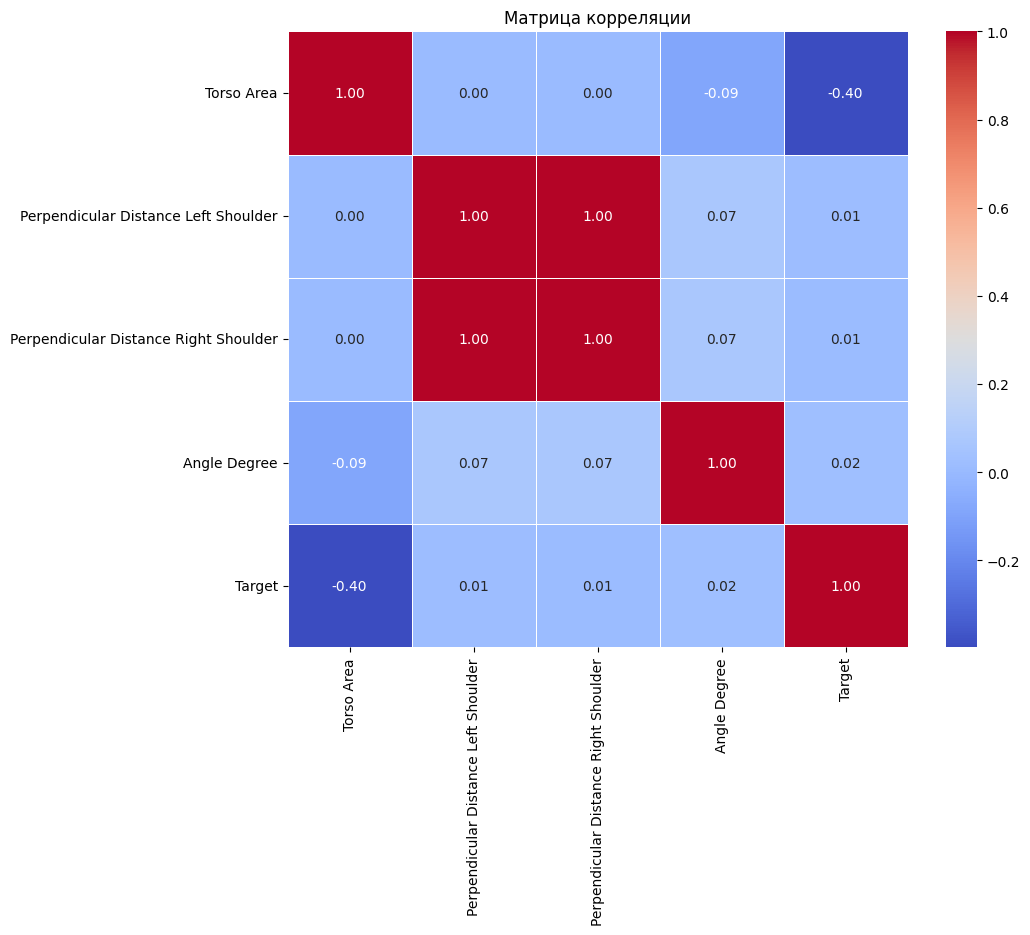

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции')
plt.show()


Model: Logistic Regression
Accuracy: 0.6522
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.67      0.55      0.60        11

    accuracy                           0.65        23
   macro avg       0.65      0.65      0.65        23
weighted avg       0.65      0.65      0.65        23


Model: SGD Classifier
Accuracy: 0.3913
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42        12
           1       0.36      0.36      0.36        11

    accuracy                           0.39        23
   macro avg       0.39      0.39      0.39        23
weighted avg       0.39      0.39      0.39        23


Model: Linear SVM
Accuracy: 0.6522
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.67      0.55      0.60     

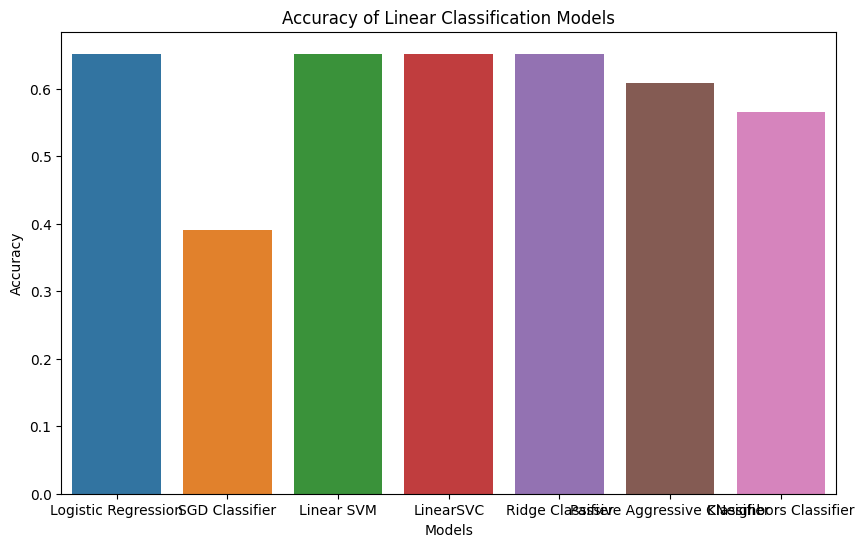

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(),
    'Linear SVM': SVC(kernel='linear', probability=True),
    'LinearSVC': LinearSVC(),
    'Ridge Classifier': RidgeClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'KNeighbors Classifier': KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Classification Report:\n{result['Classification Report']}\n")

accuracy_values = [result['Accuracy'] for result in results.values()]
models_names = list(models.keys())

plt.figure(figsize=(10, 6))
sns.barplot(x=models_names, y=accuracy_values)
plt.title('Accuracy of Linear Classification Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()
